# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification.

To practice multi-class classification, we're going to build a neural network to classify images of different items of clothing.



In [34]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from tensorflow.keras.datasets import fashion_mnist

In [36]:
# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [37]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [38]:
# Check the shape of the single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

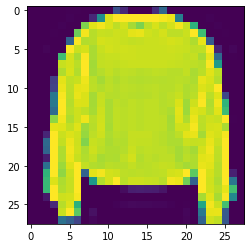

In [39]:
# Plot a single sample
plt.imshow(train_data[7]);

In [40]:
# Check out samples label
train_labels[7]

2

In [41]:
# Create a small list so we can index onto our training labels so they're human-readble
class_names =["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Bag')

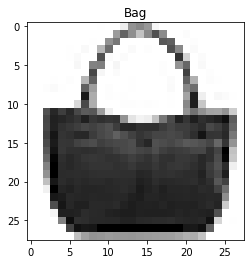

In [42]:
# Plot an example image and its label
index_of_choice = 100
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

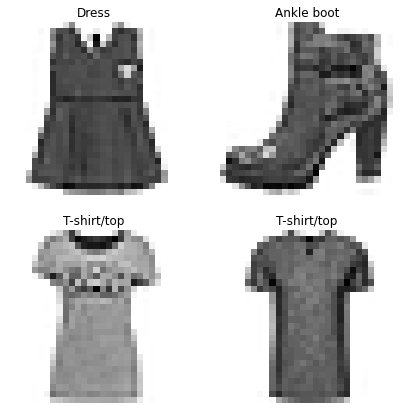

In [43]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model, we can use a similar architecture to our binary classifiers, however, we're going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = `tf.keras.losses.CategoricalCrossentropy()`
    * If your labels are one-hot encoded, use `CategoricalCrossentropy()`
    * If your labels are nteger form use `SparseCategoricalCrossentropy()`
* Output layer activation = Softmax (not Sigmoid)

In [49]:
# our data needs to be flattened (from 28*28 to None, 784)

flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [50]:
28 * 28

784

In [70]:
# Building the model

# Set random seed
tf.random.set_seed(42)

# 1. Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")])

In [71]:
# 2. Compile the model
model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.Accuracy())

In [72]:
# 3. Fit the model
non_norm_history = model_13.fit(train_data,
                               tf.one_hot(train_labels, depth=10),
                               epochs=10,
                               validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1629 - accuracy: 0.0073 - val_loss: 1.8070 - val_accuracy: 0.0303
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7039 - accuracy: 0.0311 - val_loss: 1.6755 - val_accuracy: 0.0560
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6331 - accuracy: 0.0517 - val_loss: 1.6065 - val_accuracy: 0.0546
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6032 - accuracy: 0.0592 - val_loss: 1.6056 - val_accuracy: 0.0598
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.0619 - val_loss: 1.6016 - val_accuracy: 0.0794
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5913 - accuracy: 0.0728 - val_loss: 1.5698 - val_accuracy: 0.0559
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5738 - accuracy: 0.0593 - val_loss: 1.5715 - val_accuracy:

In [73]:
# Check the model summary

model_13.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 4)                 3140      
                                                                 
 dense_34 (Dense)            (None, 4)                 20        
                                                                 
 dense_35 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Check the min and max values of the training data

train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 & 1.

In [75]:
# We can get our training and testing data between 0 $ 1 by dividing by te maximum

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [77]:
# Train again model 13, but this time is normalized

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation ="softmax")
])

# 2. Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model 
norm_histroy = model_14.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_ac

**Note:** Neural networks tend to prefer data in numerical form as well as scahled/normalized (numbers between 0 & 1).

<AxesSubplot:title={'center':'Normalized data'}>

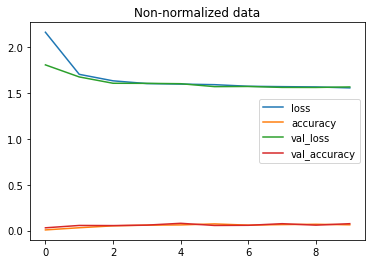

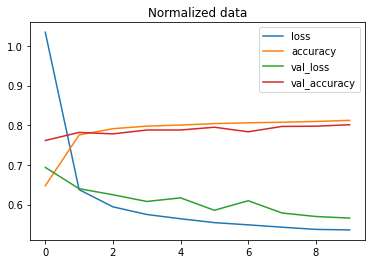

In [78]:
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

# Plot normalied data loss curves
pd.DataFrame(norm_histroy.history).plot(title="Normalized data")

**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when your're compariing models, it's important to make sure your're comparing them on the same criteria (e.g. same architecture but different data **or** same data but different architecture.)

## Finding the ideal learning rate

In [79]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_15.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# 3. Fit the model
find_lr_history = model_15.fit(train_data_norm,
                      train_labels,
                      epochs=40,
                      validation_data=(test_data_norm, test_labels),
                      callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 15s 7ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 14s 8ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================

Text(0.5, 1.0, 'Finding the ideal learning rate')

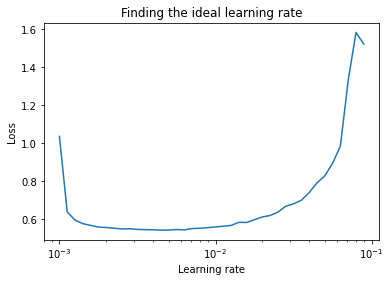

In [81]:
# Plot the learning rate decay curve

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [82]:
# Let's refit a model with the ideal learning rate

#  Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_16 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# 2. Compile the model
model_16.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.002),
                metrics=["accuracy"])

# 3. Fit the model
history_16 = model_16.fit(train_data_norm,
                      train_labels,
                      epochs=20,
                      validation_data=(test_data_norm, test_labels))

c:\users\ovidi\projects\ibmqx\qiskit\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 1.0286 - accuracy: 0.6631 - val_loss: 0.7823 - val_accuracy: 0.7399
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7339 - accuracy: 0.7486 - val_loss: 0.7267 - val_accuracy: 0.7541
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.6805 - accuracy: 0.7617 - val_loss: 0.7010 - val_accuracy: 0.7590
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.6555 - accuracy: 0.7685 - val_loss: 0.6713 - val_accuracy: 0.7667
Epoch 5/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.6375 - accuracy: 0.7742 - val_loss: 0.6683 - val_accuracy: 0.7670
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6223 - accuracy: 0.7790 - val_loss: 0.6601 - val_accuracy: 0.7729
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6140 - accuracy: 0.7828 - val_loss: 0.6549 - val_ac

## Evaluating our multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualisation)
* Improve its results (by training it for longer or changing the architecture)
* Save and explore it for use in an application

Let's go through the top 2 ...

In [83]:
# Create a confusion matrix function
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    # Create the confusion metrix

    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]

    # Better figure
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # label the axes
    ax.set(title="Confusion Matrix",
          xlabel = "Predicted Label",
          ylabel = "True Label",
          xticks = np.arange(n_classes),
          yticks = np.arange(n_classes),
          xticklabels = labels,
          yticklabels = labels)

    # Set x-axis label to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color= "white" if cm[i, j] > threshold else "black",
                size=text_size)

In [84]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [88]:
# Make some predictions with our model
y_probs = model_16.predict(test_data_norm) # probs is short for prediction probabilites

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[2.6798383e-05, 4.1994865e-23, 5.3758651e-09, 6.4775650e-11,
        2.2152943e-10, 4.7423467e-02, 6.6337352e-06, 2.3773775e-01,
        4.5434394e-06, 7.1480083e-01],
       [4.0451559e-07, 1.6188236e-13, 9.8356342e-01, 6.3144555e-12,
        1.2388914e-02, 2.9828209e-17, 3.6301222e-03, 6.4525598e-15,
        4.1699928e-04, 1.1228151e-22],
       [3.8795630e-03, 9.7660089e-01, 2.4876639e-04, 1.8112844e-02,
        2.2239565e-05, 4.3499931e-06, 1.1085054e-03, 3.6326526e-08,
        2.2921160e-05, 4.7223858e-10],
       [3.8795630e-03, 9.7660089e-01, 2.4876639e-04, 1.8112844e-02,
        2.2239565e-05, 4.3499931e-06, 1.1085054e-03, 3.6326526e-08,
        2.2921160e-05, 4.7223858e-10],
       [9.5143519e-02, 1.2842314e-03, 3.8589996e-01, 3.9515370e-03,
        2.6380952e-02, 6.1832037e-07, 4.7955170e-01, 5.4963216e-08,
        7.7874637e-03, 2.3460600e-11]], dtype=float32)

**Note:** Remember to make predictions on the same kind of data your model was trained on (e.g., if your model was trained on normalized data, you'll want to make predictions on normalized data).

In [90]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.6798383e-05, 4.1994865e-23, 5.3758651e-09, 6.4775650e-11,
        2.2152943e-10, 4.7423467e-02, 6.6337352e-06, 2.3773775e-01,
        4.5434394e-06, 7.1480083e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [91]:
# Convert all of the prediciton probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 predictions labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [93]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true= test_labels,
                y_pred=y_preds)

array([[684,   0,  26, 111,   4,   1, 157,   2,  15,   0],
       [  9, 900,   3,  67,   3,   0,  17,   0,   1,   0],
       [ 14,   0, 715,   8, 121,   1, 132,   0,   9,   0],
       [ 12,  10,   8, 791,  40,   0, 130,   0,   9,   0],
       [  1,   0, 156,  34, 708,   0,  88,   0,  13,   0],
       [  1,   0,   0,   0,   0, 876,   0,  52,  12,  59],
       [107,   0, 171,  70, 246,   1, 383,   0,  22,   0],
       [  0,   0,   0,   0,   0,  31,   0, 928,   4,  37],
       [  2,   0,  18,  11,  11,   2,   8,  13, 934,   1],
       [  1,   0,   0,   0,   0,  11,   0,  64,   0, 924]], dtype=int64)

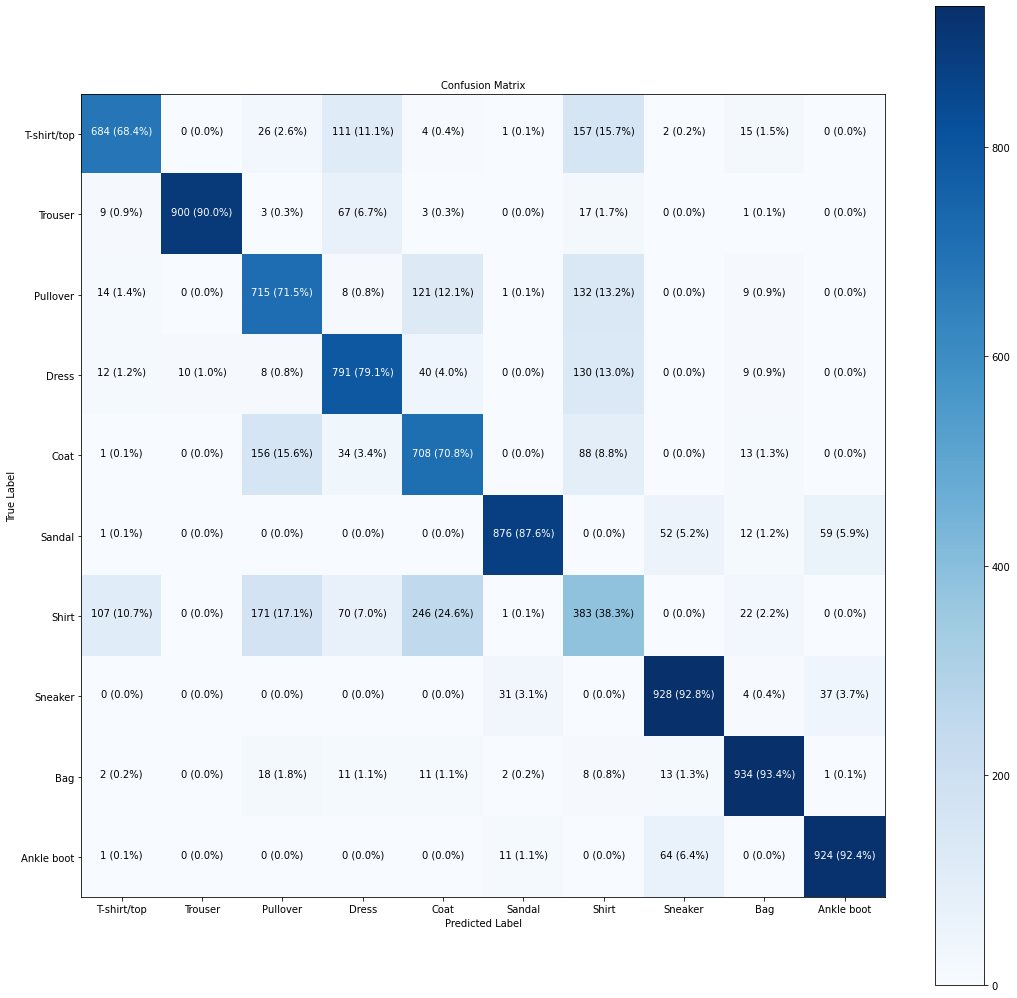

In [98]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                     y_pred=y_preds,
                     classes=class_names,
                     figsize=(18,18),
                     text_size=10)

**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [99]:
import random

def plot_random_image(model, images, true_labels, classes):
    """Picks a random image, plots it and labels it with a prediction and truth label."""
    # Set up random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]
    
    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color="green"
    else:
        color="red"
        
    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # set the color to green or red based on if prediction is right or wrong
    
    

1/1 [==============================] - 0s 45ms/step


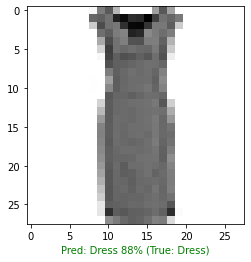

In [104]:
# Check out a random image as well as its prediction

plot_random_image(model=model_16,
                 images=test_data_norm,
                 true_labels=test_labels,
                 classes=class_names)

## What patterns is our model learning?

In [105]:
# Find the layers of our most recent model
model_16.layers

In [106]:
# Extract a particular layer
model_16.layers[1]

In [107]:
# Get the partterns of a layer in our network
weights, biases = model_16.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.0287192 , -0.142935  , -0.5580195 , -0.15715167],
        [ 0.4310247 ,  0.5894509 , -0.9410706 ,  1.1809889 ],
        [-0.25782204,  1.2135735 , -1.1449969 , -0.01333491],
        ...,
        [ 0.9264444 ,  0.62799954, -0.37683886,  0.69162154],
        [ 0.9672661 ,  0.8073854 , -0.10562594, -0.3712014 ],
        [-0.6306353 ,  1.29591   , -1.4492764 , -0.45358393]],
       dtype=float32),
 (784, 4))

Now let's check out the bias vector ...

In [109]:
# Bias and biasses shapes
biases, biases.shape

(array([1.7672014, 3.0625284, 3.6039205, 2.9277337], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get initialized as zeros (at least in the case of a TensorFlow Dense layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [110]:
model_16.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 4)                 3140      
                                                                 
 dense_43 (Dense)            (None, 4)                 20        
                                                                 
 dense_44 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


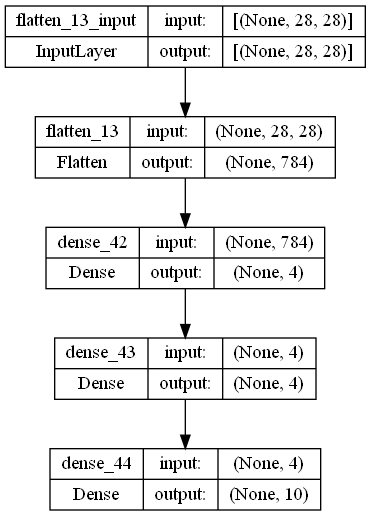

In [111]:
# let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_16, show_shapes= True)